In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bezierv.classes.bezierv import Bezierv
from bezierv.algorithms.proj_grad import ProjGrad
from bezierv.algorithms.conv_bezierv import ConvBezier

In [19]:
np.random.seed(0)
x = np.sort(np.random.normal(1, 1, 1000))
y = np.sort(np.random.normal(1, 1, 1000))

In [20]:
n = 6
bezierv_x = Bezierv(n)
bezierv_y = Bezierv(n)

# The initalization of x controls is very important and we should have a smart way to do this

bx_controls_z = np.linspace(0, 1, n + 1)
by_controls_z = np.linspace(0, 1, n + 1) 

In [21]:
projgrad_x = ProjGrad(bezierv_x, x)
projgrad_y = ProjGrad(bezierv_y, y)

bezierv_x_fitted = projgrad_x.fit(bx_controls_z, step=0.001)
bezierv_y_fitted = projgrad_y.fit(by_controls_z, step=0.001)

Converged in 604 iterations
Converged in 99 iterations


In [22]:
projgrad_x.mse

np.float64(3.722312494802878e-05)

In [23]:
projgrad_y.mse

np.float64(5.341897208606686e-05)

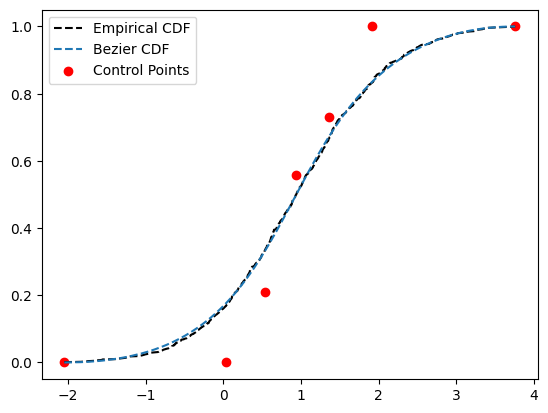

In [24]:
bezierv_x_fitted.plot_cdf(x, ecdf=None)

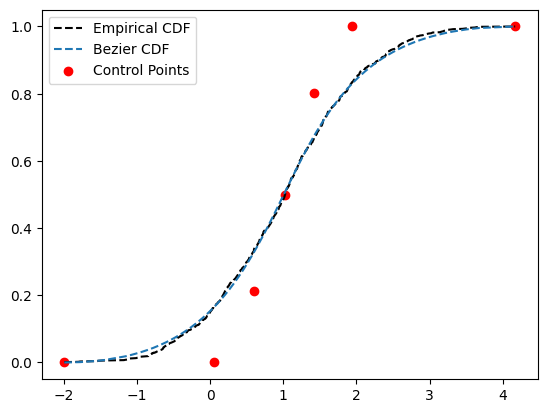

In [25]:
bezierv_y_fitted.plot_cdf(y, ecdf=None)

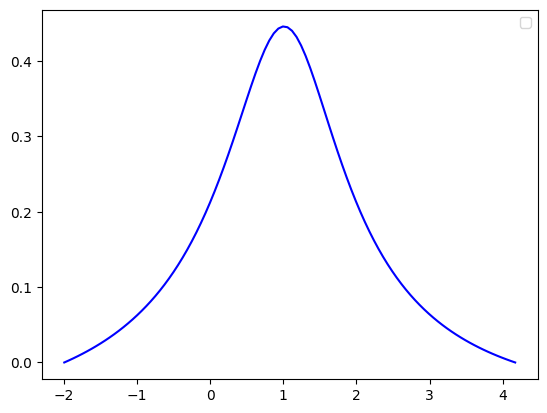

In [26]:
bezierv_y_fitted.plot_pdf()

In [27]:
print(bezierv_x_fitted.get_mean())
print(bezierv_x_fitted.get_variance())
print(bezierv_y_fitted.get_mean())
print(bezierv_y_fitted.get_variance())

0.9451072911932644
0.9972262591944393
1.0122252543033134
1.0237242716730786


In [28]:
from scipy.integrate import quad
result, error = quad(bezierv_x_fitted.pdf_x, x[0], x[-1])
result


0.9999999999998349

In [29]:
convoluter = ConvBezier(bezierv_x_fitted, bezierv_y_fitted, m=1000)

In [30]:
convoluter.cdf_z(2)

0.5132234956590461

In [31]:
bezierv_conv, cdf, data = convoluter.conv()

Converged in 68 iterations


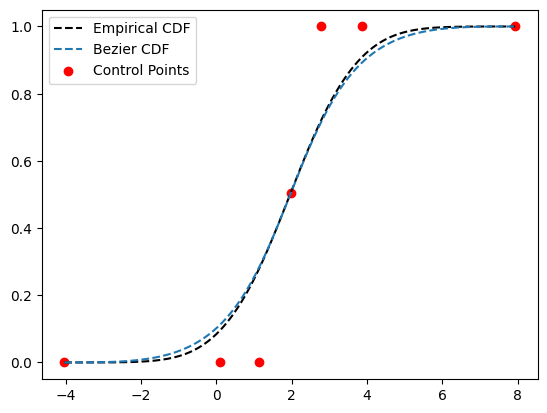

In [32]:
bezierv_conv.plot_cdf(data, cdf)

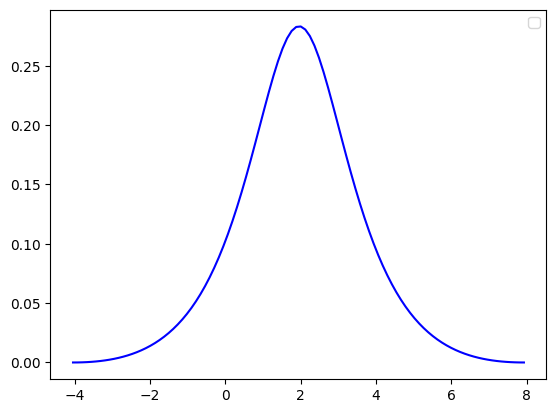

In [33]:
bezierv_conv.plot_pdf()

In [34]:
bezierv_conv.get_mean()
bezierv_conv.get_variance()

2.456753614564199